In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/titanic.csv")
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [7]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [8]:
data["Survived"] = data["Survived"].map({0: "death", 1: "survival"})
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,death
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,survival
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,survival
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,survival
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,death


### 1. 간단한 시각화

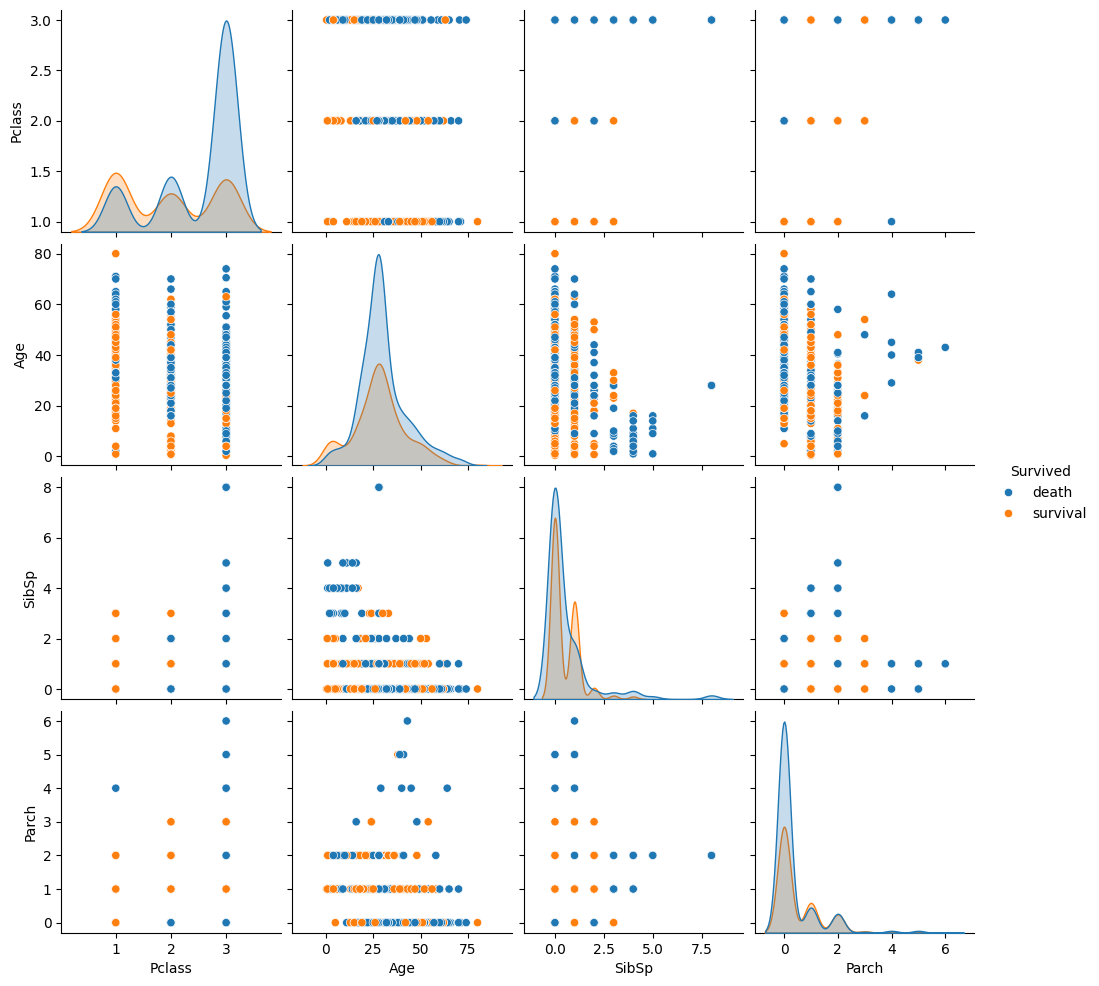

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data, hue="Survived")

In [10]:
corr = data.corr(numeric_only = True)
corr

,Pclass,Age,SibSp,Parch
Pclass,1.000000,-0.336512,0.081656,0.016824
Age,-0.336512,1.000000,-0.232543,-0.171485
SibSp,0.081656,-0.232543,1.000000,0.414542
Parch,0.016824,-0.171485,0.414542,1.000000


<Axes: >

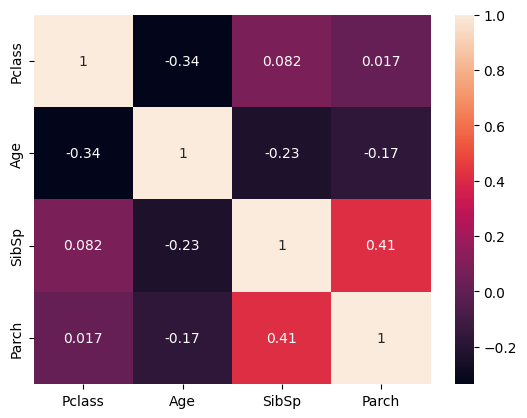

In [11]:
sns.heatmap(corr, annot = True)

### 2. ML용 데이터 전처리
1. 원핫인코딩: 독립변수의 범주형 변수를 변환하기 - 더미 변수로
2. 이름, 티켓번호 삭제
3. 독립변수/종속변수
4. 훈련세트/테스트세트
5. 표준화

In [12]:
# pd.get_dummies(data, columns=["Sex", "Embarked"])
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)
data

,Pclass,Name,Age,SibSp,Parch,Ticket,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,death,True,False,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,survival,False,False,False
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,survival,False,False,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,survival,False,False,True
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,death,True,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",27.0,0,0,211536,death,True,False,True
885,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,survival,False,False,True
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,death,False,False,True
887,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,survival,True,False,False


In [13]:
X = data.drop("Survived", axis = 1)
y = data["Survived"]

display(X, y)

,Pclass,Name,Age,SibSp,Parch,Ticket,Sex_male,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,True,False,True
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,False,False,False
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,False,False,True
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,False,False,True
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,True,False,True
...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",27.0,0,0,211536,True,False,True
885,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,False,False,True
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,False,False,True
887,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,True,False,False


0         death
1      survival
2      survival
3      survival
4         death
         ...   
884       death
885    survival
886       death
887    survival
888       death
Name: Survived, Length: 889, dtype: object

In [14]:
X.drop(["Name", "Ticket"], axis = 1, inplace=True)
display(X)

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,True,False,True
1,1,38.0,1,0,False,False,False
2,3,26.0,0,0,False,False,True
3,1,35.0,1,0,False,False,True
4,3,35.0,0,0,True,False,True
...,...,...,...,...,...,...,...
884,2,27.0,0,0,True,False,True
885,1,19.0,0,0,False,False,True
886,3,28.0,1,2,False,False,True
887,1,26.0,0,0,True,False,False


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(622, 7) (267, 7) (622,) (267,)


In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

display(X_train_scaled)

array([[ 0.80015241,  0.12533178,  0.45428202, ..., -1.39066972,
        -0.31454718,  0.59096597],
       [-0.41670529, -0.48890293, -0.46912784, ...,  0.719078  ,
        -0.31454718,  0.59096597],
       [ 0.80015241,  1.04668385, -0.46912784, ...,  0.719078  ,
        -0.31454718,  0.59096597],
       ...,
       [-1.63356299,  1.43058054,  0.45428202, ..., -1.39066972,
        -0.31454718, -1.6921448 ],
       [-1.63356299,  0.04855244, -0.46912784, ...,  0.719078  ,
        -0.31454718, -1.6921448 ],
       [ 0.80015241, -0.18178558, -0.46912784, ...,  0.719078  ,
        -0.31454718,  0.59096597]])

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(f"dt score(train) = {round(dt.score(X_train, y_train), 2)}%")
print(f"dt score(test) = {round(dt.score(X_test, y_test), 2)}%")

dt score(train) = 0.94%
dt score(test) = 0.82%


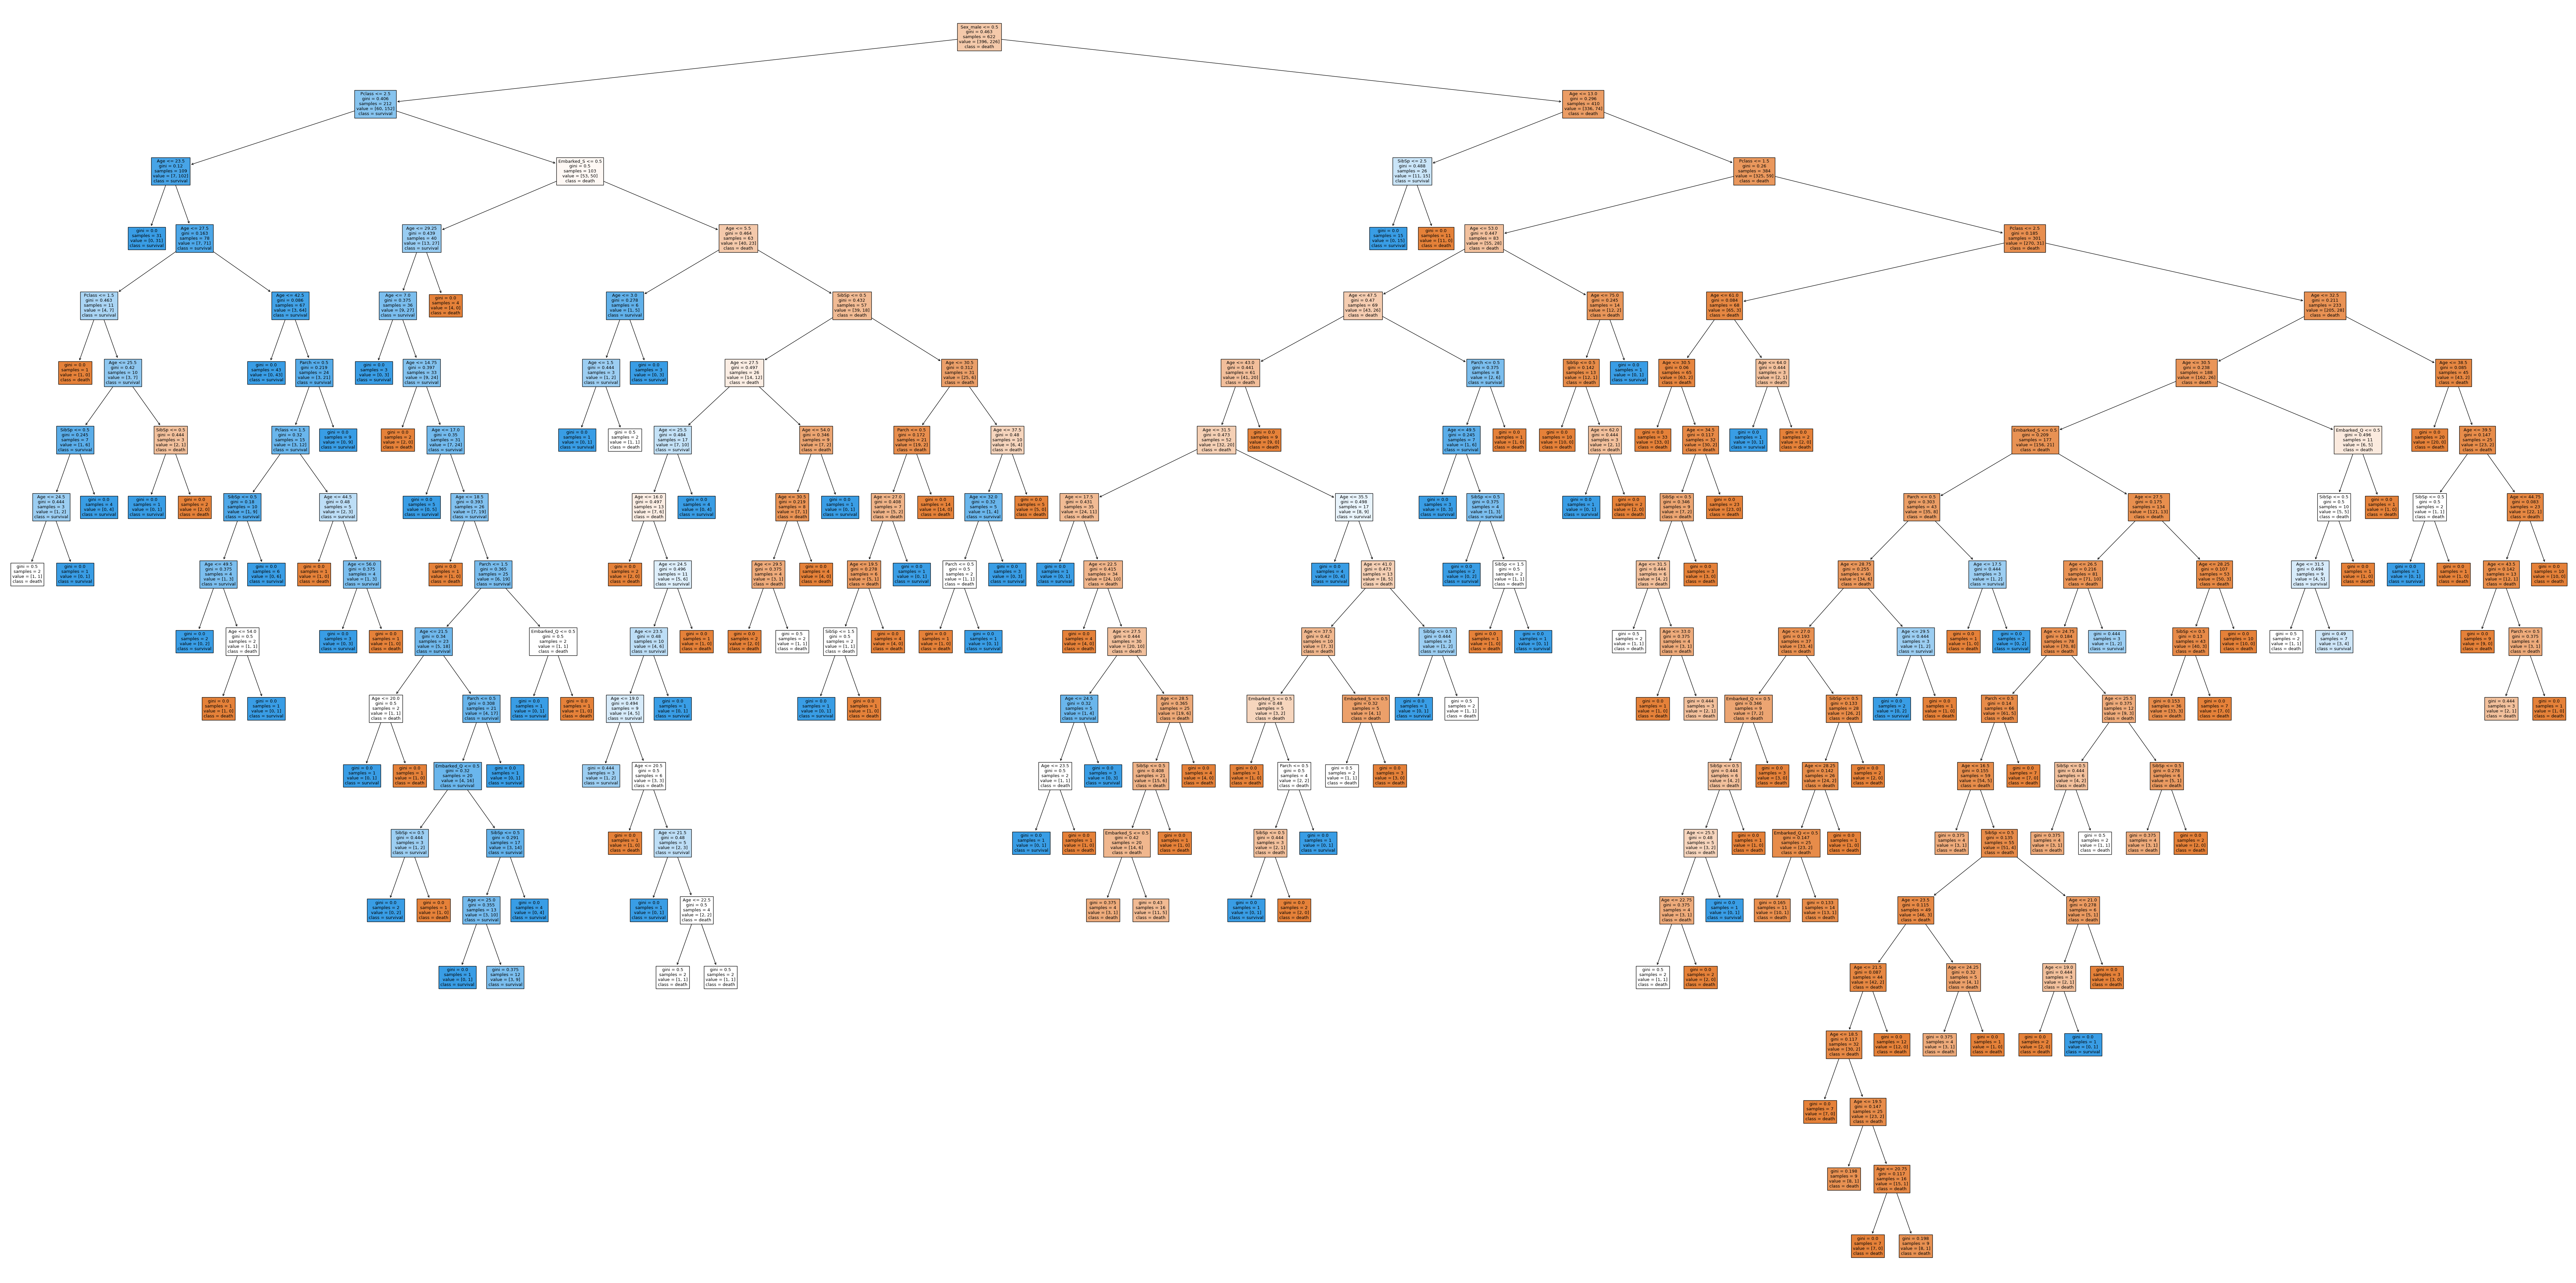

In [18]:
plt.figure(figsize=(100, 50))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=pd.unique(y))
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(f"rf score(train) = {round(rf.score(X_train, y_train), 2)}%")
print(f"rf score(test) = {round(rf.score(X_test, y_test), 2)}%")

rf score(train) = 0.94%
rf score(test) = 0.83%


In [34]:
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train, y_train)

print(f"rf score(train) = {round(rf.score(X_train, y_train), 2)}%")
print(f"rf score(test) = {round(rf.score(X_test, y_test), 2)}%")

rf score(train) = 0.94%
rf score(test) = 0.84%


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
    "n_estimators": [100, 150, 250],
    "max_depth": [3, 4, 5, 6],
    "min_samples_leaf": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8, 10]
}

gs = GridSearchCV(RandomForestClassifier(), params, cv=StratifiedKFold())
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 150, 250]})

In [33]:
print(f"최적의 rf 파라미터: {gs.best_params_}", end="\n\n")
print(f"gs_rf 교차 검증 정확도들: {gs.cv_results_['mean_test_score']}", end="\n\n")
print(f"gs_rf 교차 검증 정확도: {gs.best_score_}")

최적의 rf 파라미터: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 250}

gs_rf 교차 검증 정확도들: [0.82474839 0.82476129 0.82634839 0.82796129 0.82634839 0.82634839
 0.81989677 0.82314839 0.82634839 0.82477419 0.82312258 0.82796129
 0.82154839 0.82634839 0.82794839 0.81509677 0.81828387 0.82473548
 0.82150968 0.82794839 0.82794839 0.82633548 0.82472258 0.82473548
 0.82473548 0.81996129 0.82474839 0.81992258 0.82634839 0.82634839
 0.82313548 0.82313548 0.82634839 0.81832258 0.82152258 0.82474839
 0.82636129 0.81828387 0.82313548 0.81830968 0.81508387 0.82313548
 0.81989677 0.82152258 0.82313548 0.82313548 0.82313548 0.82313548
 0.82152258 0.82154839 0.81996129 0.82474839 0.82313548 0.82474839
 0.82476129 0.82152258 0.81990968 0.82312258 0.82794839 0.82150968
 0.81508387 0.81829677 0.82314839 0.81992258 0.82474839 0.82474839
 0.82156129 0.82152258 0.82474839 0.82474839 0.82636129 0.82150968
 0.82636129 0.81830968 0.82314839 0.83117419 0.82473548 0.82794839
 0.82634839 

In [43]:
rf = gs.best_estimator_

print(f"gs_rf train score: {rf.score(X_train, y_train)}")
print(f"gs_rf test score: {rf.score(X_test, y_test)}")

gs_rf train score: 0.6366559485530546
gs_rf test score: 0.5730337078651685


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [35]:
ftr_imp = rf.feature_importances_
print(ftr_imp)

[0.12578579 0.38647377 0.07815855 0.05892744 0.30447937 0.01300503
 0.03317005]


<Axes: xlabel='None', ylabel='None'>

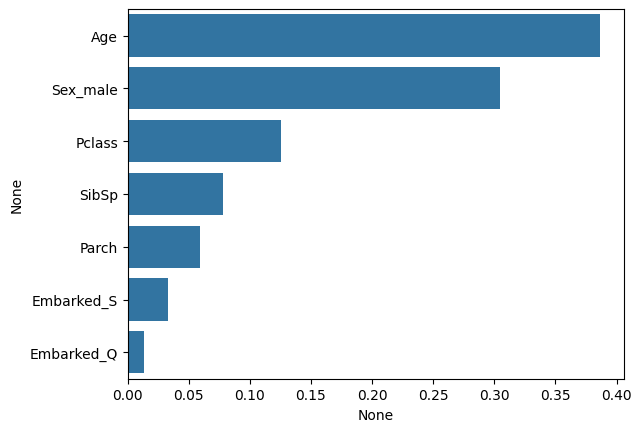

In [36]:
ftr = pd.Series(ftr_imp, index = X_train.columns)
ftr = ftr.sort_values(ascending=False)

sns.barplot(x = ftr, y = ftr.index)

In [45]:
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test)

print(rf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

0.5730337078651685
              precision    recall  f1-score   support

       death       0.80      0.92      0.86       153
    survival       0.87      0.69      0.77       114

    accuracy                           0.82       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.82      0.82       267



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[141,  12],
       [ 35,  79]])

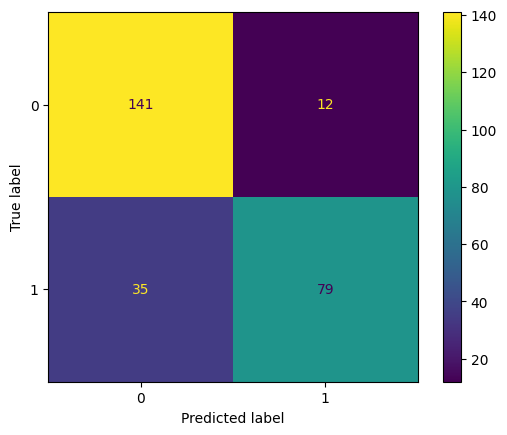

In [53]:
from sklearn import metrics

metrics.ConfusionMatrixDisplay(cm).plot()